In [ ]:
# Como funciona a lógica do programa?

* Pegar composição do Ibovespa desde 2015. (Definir universo investível)
* Criar a lista de códigos de negociação de todas as empresas que passaram no Ibovespa desde 2015.
* Puxar as cotações dessa lista de códigos de negociação. 
* Tratar os dados de cotação: Lidar com dados faltantes, mudar para a frequência mensal e correção/extração das datas. 
* Calcular retornos mensais e 6 meses (retorno da carteira e indicador momento 6 meses).
* Tratar dados de retorno e preço para um formato mais amigável. 
* Calcular retornos do modelo.
* Puxar dados do Ibovespa.
* Tretar os dados e calcular retorno mensal do Ibovespa.
* Visualizar retornos e estatística mensal do modelo e do Ibovespa.
* Calcular retorno ano a ano.
* Calcular retorno acumulado.
* Visualizar retorno acumulado.

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
import quantstats as qs
import jinja2
import mplcyberpunk
import matplotlib.ticker as mtick

In [2]:
tickers = pd.read_excel('composicao_ibov (1).xlsx')
tickers

,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,...,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31
0,ABEV3,ABEV3,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,...,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3
1,AMER3,BBAS3,ABEV3,BBDC4,BBDC4,ABEV3,ABEV3,ABEV3,BBDC4,ABEV3,...,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4
2,AURE3,BBDC3,BBDC4,ABEV3,ABEV3,BBDC4,BBDC4,BBDC4,ABEV3,BBDC4,...,ITUB4,PETR3,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4
3,B3SA3,BBDC4,BRFS3,PETR4,PETR4,BRFS3,PETR4,PETR4,PETR4,PETR4,...,PETR3,ITUB4,BBDC4,PETR3,BBDC4,BBDC4,BBDC4,BBDC4,PETR3,PETR3
4,B3SA3,BBSE3,CIEL3,BRFS3,PETR3,PETR4,BRFS3,BRFS3,BRFS3,BRFS3,...,BBDC4,BBDC4,PETR3,BBDC4,B3SA3,PETR3,PETR3,PETR3,BBDC4,BBDC4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BEEF3,EZTC3,BEEF3,EZTC3,JHSF3,JHSF3,GOLL4,GOLL4,GOLL4,GOLL4
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,EZTC3,BIDI4,EZTC3,JHSF3,EZTC3,EZTC3,JHSF3,EZTC3,CASH3,CASH3
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CASH3,JHSF3,JHSF3,CASH3,CASH3,CASH3,EZTC3,CASH3,POSI3,POSI3
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,JHSF3,CASH3,CASH3,POSI3,POSI3,POSI3,CASH3,POSI3,NaN,NaN


In [3]:
# pegando lista de tickers

intervalo_tempo = tickers.columns

lista_tickers = []

for mes in intervalo_tempo:
    tickers_no_ano = tickers[mes]
    tickers_no_ano = tickers_no_ano.dropna()
    tickers_no_ano = tickers_no_ano + '.SA'
    lista_tickers.append(tickers_no_ano)
    
lista_tickers_finais = pd.concat(lista_tickers)
lista_tickers_finais = lista_tickers_finais.drop_duplicates()
lista_tickers_finais = list(lista_tickers_finais)
lista_tickers_finais

['ABEV3.SA',
 'AMER3.SA',
 'AURE3.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BRAP4.SA',
 'BRFS3.SA',
 'BRKM5.SA',
 'BRML3.SA',
 'BRPR3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIG4.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CPLE6.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CYRE3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'EQTL3.SA',
 'FIBR3.SA',
 'GGBR4.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'HGTX3.SA',
 'HYPE3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'KLBN11.SA',
 'LREN3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'OIBR3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RENT3.SA',
 'SANB11.SA',
 'SBSP3.SA',
 'SUZB3.SA',
 'TIMS3.SA',
 'UGPA3.SA',
 'USIM5.SA',
 'VALE3.SA',
 'VALE5.SA',
 'VIVT3.SA',
 'YDUQ3.SA',
 'WEGE3.SA',
 'ELET6.SA',
 'TAEE11.SA',
 'FLRY3.SA',
 'MGLU3.SA',
 'SAPR11.SA',
 'VVAR11.SA',
 'JPSA3.SA',
 'CVCB3.SA',
 'VIIA3.SA',
 'LOGG3.SA',
 'VBBR3.SA',
 'IRBR3.SA',
 'AZUL4.SA',
 'HAPV3.SA',
 'BPAC1

In [4]:
# puxando dados de cotações ajustadas

dados_cotacao = pdr.get_data_yahoo(symbols = lista_tickers_finais,
                                   start = '2015-06-30', end = '2022-08-12')['Adj Close']


C:\Users\USER\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'HGTX3.SA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\USER\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'JPSA3.SA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\USER\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'LCAM3.SA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\USER\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'BIDI11.SA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\USER\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'BIDI4.SA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [5]:
# resample para mensal

ultima_linha = dados_cotacao.iloc[-1:]
dados_cotacoes_mensais = dados_cotacao.resample('M').last()
dados_cotacoes_mensais

Symbols,ABEV3.SA,AMER3.SA,AURE3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,...,IGTI11.SA,CMIN3.SA,RRRP3.SA,POSI3.SA,SLCE3.SA,HGTX3.SA,JPSA3.SA,LCAM3.SA,BIDI11.SA,BIDI4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,15.441732,19.304613,NaN,2.934543,16.309515,9.621762,9.531112,19.669220,5.087125,63.513847,...,NaN,NaN,NaN,1.771179,4.797364,NaN,NaN,NaN,NaN,NaN
2015-07-31,15.832046,17.118650,NaN,2.630275,14.811558,9.517627,9.218800,18.622738,4.748948,70.009499,...,NaN,NaN,NaN,1.745004,4.880556,NaN,NaN,NaN,NaN,NaN
2015-08-31,15.523050,14.762350,NaN,2.748285,12.068587,8.666285,7.738236,17.079346,4.526719,67.720337,...,NaN,NaN,NaN,1.657754,4.461826,NaN,NaN,NaN,NaN,NaN
2015-09-30,15.913109,14.062085,NaN,2.824767,10.458093,8.138359,7.197120,14.764407,3.961483,68.762627,...,NaN,NaN,NaN,1.308753,4.963747,NaN,NaN,NaN,NaN,NaN
2015-10-31,15.642703,13.797121,NaN,2.906349,10.987878,8.082145,7.062174,15.829638,3.985639,58.544189,...,NaN,NaN,NaN,1.308753,4.775180,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,14.520000,24.000000,14.572941,13.064609,32.461609,14.627094,17.669100,24.558174,27.713346,13.580000,...,20.648689,4.740562,46.230000,7.129518,50.483852,NaN,NaN,NaN,NaN,NaN
2022-05-31,14.190000,20.100000,13.960000,12.543989,35.928734,16.579062,20.166821,25.958462,28.580000,15.650000,...,19.840000,4.830000,48.750000,7.500000,54.849998,NaN,NaN,NaN,NaN,NaN
2022-06-30,13.400000,13.430000,13.620000,10.892418,32.994507,14.301017,17.113779,25.070002,25.240000,13.590000,...,17.990000,3.860000,35.150002,5.550000,44.130001,NaN,NaN,NaN,NaN,NaN


In [6]:
# adicionando uma linha

dados_cotacoes_mensais = dados_cotacoes_mensais.append(ultima_linha)

# excluinda um linha

dados_cotacoes_mensais = dados_cotacoes_mensais.drop('2022-08-31', axis = 0)

dados_cotacoes_mensais

C:\Users\USER\AppData\Local\Temp\ipykernel_3740\1454839125.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dados_cotacoes_mensais = dados_cotacoes_mensais.append(ultima_linha)


Symbols,ABEV3.SA,AMER3.SA,AURE3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,...,IGTI11.SA,CMIN3.SA,RRRP3.SA,POSI3.SA,SLCE3.SA,HGTX3.SA,JPSA3.SA,LCAM3.SA,BIDI11.SA,BIDI4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,15.441732,19.304613,NaN,2.934543,16.309515,9.621762,9.531112,19.669220,5.087125,63.513847,...,NaN,NaN,NaN,1.771179,4.797364,NaN,NaN,NaN,NaN,NaN
2015-07-31,15.832046,17.118650,NaN,2.630275,14.811558,9.517627,9.218800,18.622738,4.748948,70.009499,...,NaN,NaN,NaN,1.745004,4.880556,NaN,NaN,NaN,NaN,NaN
2015-08-31,15.523050,14.762350,NaN,2.748285,12.068587,8.666285,7.738236,17.079346,4.526719,67.720337,...,NaN,NaN,NaN,1.657754,4.461826,NaN,NaN,NaN,NaN,NaN
2015-09-30,15.913109,14.062085,NaN,2.824767,10.458093,8.138359,7.197120,14.764407,3.961483,68.762627,...,NaN,NaN,NaN,1.308753,4.963747,NaN,NaN,NaN,NaN,NaN
2015-10-31,15.642703,13.797121,NaN,2.906349,10.987878,8.082145,7.062174,15.829638,3.985639,58.544189,...,NaN,NaN,NaN,1.308753,4.775180,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,14.520000,24.000000,14.572941,13.064609,32.461609,14.627094,17.669100,24.558174,27.713346,13.580000,...,20.648689,4.740562,46.230000,7.129518,50.483852,NaN,NaN,NaN,NaN,NaN
2022-05-31,14.190000,20.100000,13.960000,12.543989,35.928734,16.579062,20.166821,25.958462,28.580000,15.650000,...,19.840000,4.830000,48.750000,7.500000,54.849998,NaN,NaN,NaN,NaN,NaN
2022-06-30,13.400000,13.430000,13.620000,10.892418,32.994507,14.301017,17.113779,25.070002,25.240000,13.590000,...,17.990000,3.860000,35.150002,5.550000,44.130001,NaN,NaN,NaN,NaN,NaN


In [7]:
# extraindo datas das carteiras

datas_carteiras = list(dados_cotacoes_mensais.index)[6:]
datas_carteiras

[Timestamp('2015-12-31 00:00:00'),
 Timestamp('2016-01-31 00:00:00'),
 Timestamp('2016-02-29 00:00:00'),
 Timestamp('2016-03-31 00:00:00'),
 Timestamp('2016-04-30 00:00:00'),
 Timestamp('2016-05-31 00:00:00'),
 Timestamp('2016-06-30 00:00:00'),
 Timestamp('2016-07-31 00:00:00'),
 Timestamp('2016-08-31 00:00:00'),
 Timestamp('2016-09-30 00:00:00'),
 Timestamp('2016-10-31 00:00:00'),
 Timestamp('2016-11-30 00:00:00'),
 Timestamp('2016-12-31 00:00:00'),
 Timestamp('2017-01-31 00:00:00'),
 Timestamp('2017-02-28 00:00:00'),
 Timestamp('2017-03-31 00:00:00'),
 Timestamp('2017-04-30 00:00:00'),
 Timestamp('2017-05-31 00:00:00'),
 Timestamp('2017-06-30 00:00:00'),
 Timestamp('2017-07-31 00:00:00'),
 Timestamp('2017-08-31 00:00:00'),
 Timestamp('2017-09-30 00:00:00'),
 Timestamp('2017-10-31 00:00:00'),
 Timestamp('2017-11-30 00:00:00'),
 Timestamp('2017-12-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-02-28 00:00:00'),
 Timestamp('2018-03-31 00:00:00'),
 Timestamp('2018-04-

In [8]:
# preenchendo NAN com zeros para calcular retornos

dados_cotacoes_mensais = dados_cotacoes_mensais.fillna(0)
dados_cotacoes_mensais

Symbols,ABEV3.SA,AMER3.SA,AURE3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,...,IGTI11.SA,CMIN3.SA,RRRP3.SA,POSI3.SA,SLCE3.SA,HGTX3.SA,JPSA3.SA,LCAM3.SA,BIDI11.SA,BIDI4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,15.441732,19.304613,0.000000,2.934543,16.309515,9.621762,9.531112,19.669220,5.087125,63.513847,...,0.000000,0.000000,0.000000,1.771179,4.797364,0.0,0.0,0.0,0.0,0.0
2015-07-31,15.832046,17.118650,0.000000,2.630275,14.811558,9.517627,9.218800,18.622738,4.748948,70.009499,...,0.000000,0.000000,0.000000,1.745004,4.880556,0.0,0.0,0.0,0.0,0.0
2015-08-31,15.523050,14.762350,0.000000,2.748285,12.068587,8.666285,7.738236,17.079346,4.526719,67.720337,...,0.000000,0.000000,0.000000,1.657754,4.461826,0.0,0.0,0.0,0.0,0.0
2015-09-30,15.913109,14.062085,0.000000,2.824767,10.458093,8.138359,7.197120,14.764407,3.961483,68.762627,...,0.000000,0.000000,0.000000,1.308753,4.963747,0.0,0.0,0.0,0.0,0.0
2015-10-31,15.642703,13.797121,0.000000,2.906349,10.987878,8.082145,7.062174,15.829638,3.985639,58.544189,...,0.000000,0.000000,0.000000,1.308753,4.775180,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,14.520000,24.000000,14.572941,13.064609,32.461609,14.627094,17.669100,24.558174,27.713346,13.580000,...,20.648689,4.740562,46.230000,7.129518,50.483852,0.0,0.0,0.0,0.0,0.0
2022-05-31,14.190000,20.100000,13.960000,12.543989,35.928734,16.579062,20.166821,25.958462,28.580000,15.650000,...,19.840000,4.830000,48.750000,7.500000,54.849998,0.0,0.0,0.0,0.0,0.0
2022-06-30,13.400000,13.430000,13.620000,10.892418,32.994507,14.301017,17.113779,25.070002,25.240000,13.590000,...,17.990000,3.860000,35.150002,5.550000,44.130001,0.0,0.0,0.0,0.0,0.0


In [9]:
# calculando retorno mensal

for i, nome_empresas in enumerate(dados_cotacoes_mensais.columns):
    if i == 0:
        retornos = dados_cotacoes_mensais[nome_empresas].pct_change()
        retornos = retornos.replace([np.inf, -np.inf, -1], 0)
        df_retornos = pd.DataFrame(data = {nome_empresas: retornos}, index = dados_cotacoes_mensais.index)
    else:
        df_retornos[nome_empresas] = dados_cotacoes_mensais[nome_empresas].pct_change().replace([np.inf, -np.inf, -1], 0) 

df_retornos

C:\Users\USER\AppData\Local\Temp\ipykernel_3740\2126397716.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_retornos[nome_empresas] = dados_cotacoes_mensais[nome_empresas].pct_change().replace([np.inf, -np.inf, -1], 0)
C:\Users\USER\AppData\Local\Temp\ipykernel_3740\2126397716.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_retornos[nome_empresas] = dados_cotacoes_mensais[nome_empresas].pct_change().replace([np.inf, -np.inf, -1], 0)
C:\Users\USER\AppData\Local\Temp\ipykernel_3740\2126397716.py:9: PerformanceWarning:

,ABEV3.SA,AMER3.SA,AURE3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,...,IGTI11.SA,CMIN3.SA,RRRP3.SA,POSI3.SA,SLCE3.SA,HGTX3.SA,JPSA3.SA,LCAM3.SA,BIDI11.SA,BIDI4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31,0.025277,-0.113235,NaN,-0.103685,-0.091846,-0.010823,-0.032768,-0.053204,-0.066477,0.102271,...,NaN,NaN,NaN,-0.014778,0.017341,NaN,NaN,NaN,NaN,NaN
2015-08-31,-0.019517,-0.137645,NaN,0.044866,-0.185191,-0.089449,-0.160603,-0.082877,-0.046796,-0.032698,...,NaN,NaN,NaN,-0.050000,-0.085796,NaN,NaN,NaN,NaN,NaN
2015-09-30,0.025128,-0.047436,NaN,0.027829,-0.133445,-0.060917,-0.069928,-0.135540,-0.124866,0.015391,...,NaN,NaN,NaN,-0.210526,0.112492,NaN,NaN,NaN,NaN,NaN
2015-10-31,-0.016993,-0.018842,NaN,0.028881,0.050658,-0.006907,-0.018750,0.072149,0.006098,-0.148605,...,NaN,NaN,NaN,0.000000,-0.037989,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,-0.057143,-0.264931,-0.083177,-0.153405,-0.042651,-0.100500,-0.108279,-0.005086,-0.114571,-0.269500,...,0.026406,-0.137645,0.104660,-0.155676,0.062450,NaN,NaN,NaN,NaN,NaN
2022-05-31,-0.022727,-0.162500,-0.042060,-0.039850,0.106807,0.133449,0.141361,0.057019,0.031272,0.152430,...,-0.039164,0.018867,0.054510,0.051965,0.086486,NaN,NaN,NaN,NaN,NaN
2022-06-30,-0.055673,-0.331841,-0.024355,-0.131662,-0.081668,-0.137405,-0.151389,-0.034226,-0.116865,-0.131629,...,-0.093246,-0.200828,-0.278974,-0.260000,-0.195442,NaN,NaN,NaN,NaN,NaN


In [10]:
# calculando retornos de 6 meses

for i, nome_empresas in enumerate(dados_cotacoes_mensais.columns):
    if i == 0:
        retornos = dados_cotacoes_mensais[nome_empresas].pct_change(periods = 6)
        retornos = retornos.replace([np.info, -np.inf, -1], 0)
        df_retornos_6m = pd.DataFrame(data = {nome_empresas: retornos}, index = dados_cotacoes_mensais.index)
    else:
        df_retornos_6m[nome_empresas] = dados_cotacoes_mensais[nome_empresas].pct_change(periods = 6).replace([np.info, -np.inf, -1], 0)
        
df_retornos_6m.head(10)        

C:\Users\USER\AppData\Local\Temp\ipykernel_3740\1375105559.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_retornos_6m[nome_empresas] = dados_cotacoes_mensais[nome_empresas].pct_change(periods = 6).replace([np.info, -np.inf, -1], 0)
C:\Users\USER\AppData\Local\Temp\ipykernel_3740\1375105559.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_retornos_6m[nome_empresas] = dados_cotacoes_mensais[nome_empresas].pct_change(periods = 6).replace([np.info, -np.inf, -1], 0)
C:\Users\USER\AppData\Local\Temp\ipykernel_3740\137510

,ABEV3.SA,AMER3.SA,AURE3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,...,IGTI11.SA,CMIN3.SA,RRRP3.SA,POSI3.SA,SLCE3.SA,HGTX3.SA,JPSA3.SA,LCAM3.SA,BIDI11.SA,BIDI4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,-0.044826,-0.253431,NaN,-0.019676,-0.362492,-0.235069,-0.289905,-0.263888,-0.501427,-0.150329,...,NaN,NaN,NaN,-0.162561,-0.049133,NaN,NaN,NaN,NaN,NaN
2016-01-31,-0.026100,-0.266998,NaN,0.030453,-0.340404,-0.260394,-0.308186,-0.260869,-0.644662,-0.320789,...,NaN,NaN,NaN,-0.340000,-0.070455,NaN,NaN,NaN,NaN,NaN
2016-02-29,-0.054421,-0.259615,NaN,0.116931,-0.208608,-0.034314,-0.029976,-0.130478,-0.547496,-0.251678,...,NaN,NaN,NaN,-0.273684,0.143567,NaN,NaN,NaN,NaN,NaN


In [11]:
df_retornos = df_retornos.loc['2015-12-31':]
df_retornos_6m = df_retornos_6m.loc['2015-12-31':]
df_retornos_6m

,ABEV3.SA,AMER3.SA,AURE3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,...,IGTI11.SA,CMIN3.SA,RRRP3.SA,POSI3.SA,SLCE3.SA,HGTX3.SA,JPSA3.SA,LCAM3.SA,BIDI11.SA,BIDI4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,-0.044826,-0.253431,NaN,-0.019676,-0.362492,-0.235069,-0.289905,-0.263888,-0.501427,-0.150329,...,NaN,NaN,NaN,-0.162561,-0.049133,NaN,NaN,NaN,NaN,NaN
2016-01-31,-0.026100,-0.266998,NaN,0.030453,-0.340404,-0.260394,-0.308186,-0.260869,-0.644662,-0.320789,...,NaN,NaN,NaN,-0.340000,-0.070455,NaN,NaN,NaN,NaN,NaN
2016-02-29,-0.054421,-0.259615,NaN,0.116931,-0.208608,-0.034314,-0.029976,-0.130478,-0.547496,-0.251678,...,NaN,NaN,NaN,-0.273684,0.143567,NaN,NaN,NaN,NaN,NaN
2016-03-31,-0.016942,-0.044415,NaN,0.435516,0.347494,0.330232,0.323654,0.239388,-0.210925,-0.262721,...,NaN,NaN,NaN,-0.013333,-0.117318,NaN,NaN,NaN,NaN,NaN
2016-04-30,0.031436,-0.060357,NaN,0.561556,0.434324,0.376728,0.421210,0.166876,0.080156,-0.169646,...,NaN,NaN,NaN,-0.026667,-0.098722,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,-0.112027,-0.175688,inf,0.150028,0.224242,-0.015595,0.012688,0.196896,-0.239895,-0.415411,...,inf,-0.000168,0.429499,-0.073547,0.335498,NaN,NaN,NaN,NaN,NaN
2022-05-31,-0.081956,-0.323756,inf,0.183711,0.196423,0.113366,0.154198,0.338458,-0.233300,-0.207595,...,0.069464,-0.100750,0.765025,-0.103074,0.647592,NaN,NaN,NaN,NaN,NaN
2022-06-30,-0.130999,-0.566189,inf,0.012196,0.206000,-0.004612,0.001755,0.300746,0.067465,-0.396536,...,0.002047,-0.371796,0.047690,-0.442227,0.129822,NaN,NaN,NaN,NaN,NaN


In [12]:
dados_cotacoes_mensais = dados_cotacoes_mensais.reset_index()

df_retornos = df_retornos.reset_index()
df_retornos_6m = df_retornos_6m.reset_index()

dados_cotacoes_mensais = pd.melt(dados_cotacoes_mensais, id_vars = 'Date', var_name = "Cod", value_name = 'Cotacao')
df_retornos = pd.melt(df_retornos, id_vars = 'Date', var_name = "Cod", value_name = 'retornos_1m')
df_retornos_6m = pd.melt(df_retornos_6m, id_vars = 'Date', var_name = "Cod", value_name = 'retornos_6m')

In [13]:
dados_cotacoes_mensais = dados_cotacoes_mensais.dropna() 
df_retornos = df_retornos.dropna()
df_retornos_6m = df_retornos_6m.dropna()
df_retornos_6m

,Date,Cod,retornos_6m
0,2015-12-31,ABEV3.SA,-0.044826
1,2016-01-31,ABEV3.SA,-0.026100
2,2016-02-29,ABEV3.SA,-0.054421
3,2016-03-31,ABEV3.SA,-0.016942
4,2016-04-30,ABEV3.SA,0.031436
...,...,...,...
8014,2022-04-30,SLCE3.SA,0.335498
8015,2022-05-31,SLCE3.SA,0.647592
8016,2022-06-30,SLCE3.SA,0.129822
8017,2022-07-31,SLCE3.SA,0.005206


In [15]:

lista_retornos = []

#Logica: Pega os codigos de negociação -> Acha os retornos 6M -> Filtra os 10 maiores -> Calcula o retorno de 1 mês dessa carteira -> Repete

for indice, mes in enumerate(datas_carteiras):

    #pegando empresas do ibov mes a mes

    empresas_ibov = tickers[intervalo_tempo[indice]]

    empresas_ibov = list(empresas_ibov.dropna().values) 

    empresas_ibov = [empresa + ".SA" for empresa in empresas_ibov] #quero x a cada y

    #pegando retornos 6 meses pra criar o ranking

    retornos_empresas_ibov_esse_ano = df_retornos_6m[(df_retornos_6m["Cod"].isin(empresas_ibov)) &
                                                     (df_retornos_6m['Date'] == mes)]

    #pegando os 10 maiores retornos

    dez_maiores_retornos = retornos_empresas_ibov_esse_ano.sort_values(by = "retornos_6m",
                                                                       ascending = False).head(10)

    tickers_dez_maiores_retornos = dez_maiores_retornos["Cod"].to_list()

    #calculando retorno da carteira 

    if indice != (len(datas_carteiras) - 1): #A ultima carteira não tem retorno

        retornos_1m_seguintes = df_retornos[(df_retornos["Cod"].isin(tickers_dez_maiores_retornos)) &
                                            (df_retornos['Date'] == datas_carteiras[indice + 1])]

        retorno_mes = np.mean(retornos_1m_seguintes['retornos_1m'])

        df_retorno_modelo = pd.DataFrame(data = {"retorno": retorno_mes},
                                         index = [(mes + relativedelta(months=1))])

        lista_retornos.append(df_retorno_modelo)


retornos_modelo = pd.concat(lista_retornos)

print(dez_maiores_retornos)
retornos_modelo

           Date       Cod  retornos_6m
1214 2022-08-12  CIEL3.SA     1.100152
5021 2022-08-12  ELET6.SA     0.484490
1295 2022-08-12  CMIG4.SA     0.409635
3725 2022-08-12  PETR4.SA     0.396325
3644 2022-08-12  PETR3.SA     0.391320
2024 2022-08-12  ELET3.SA     0.375388
6884 2022-08-12  ASAI3.SA     0.348150
7937 2022-08-12  POSI3.SA     0.343601
6479 2022-08-12  BEEF3.SA     0.335696
647  2022-08-12  BBSE3.SA     0.327257


,retorno
2016-01-31,-0.043231
2016-02-29,0.076903
2016-03-29,0.091320
2016-04-30,0.165053
2016-05-30,-0.164842
...,...
2022-04-30,-0.024692
2022-05-30,0.058736
2022-06-30,-0.109157
2022-07-30,0.098388


In [16]:
# pegando dados do ibov

ibovespa = pdr.get_data_yahoo(symbols = '^BVSP', start = '2015-12-30',  end = '2022-08-12')['Adj Close']
retornos_ibovespa = ibovespa.resample('M').last().pct_change().dropna()

retornos_ibovespa

Date
2016-01-31   -0.067912
2016-02-29    0.059100
2016-03-31    0.169673
2016-04-30    0.077035
2016-05-31   -0.100889
                ...   
2022-04-30   -0.101026
2022-05-31    0.032213
2022-06-30   -0.115033
2022-07-31    0.046914
2022-08-31    0.093045
Freq: M, Name: Adj Close, Length: 80, dtype: float64

In [17]:
retornos_modelo['ibovespa'] = retornos_ibovespa.values
retornos_modelo.style.format({'retorno': '{:,.2%}'.format, 'ibovespa': '{:,.2%}'.format})

,retorno,ibovespa
2016-01-31 00:00:00,-4.32%,-6.79%
2016-02-29 00:00:00,7.69%,5.91%
2016-03-29 00:00:00,9.13%,16.97%
2016-04-30 00:00:00,16.51%,7.70%
2016-05-30 00:00:00,-16.48%,-10.09%
2016-06-30 00:00:00,7.75%,6.30%
2016-07-30 00:00:00,11.46%,11.22%
2016-08-31 00:00:00,6.64%,1.03%
2016-09-30 00:00:00,-2.72%,0.80%
2016-10-30 00:00:00,20.92%,11.24%


C:\Users\USER\anaconda3\lib\site-packages\quantstats\stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


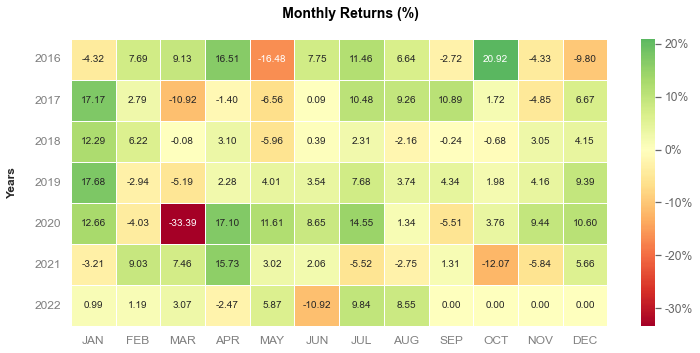

C:\Users\USER\anaconda3\lib\site-packages\quantstats\stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


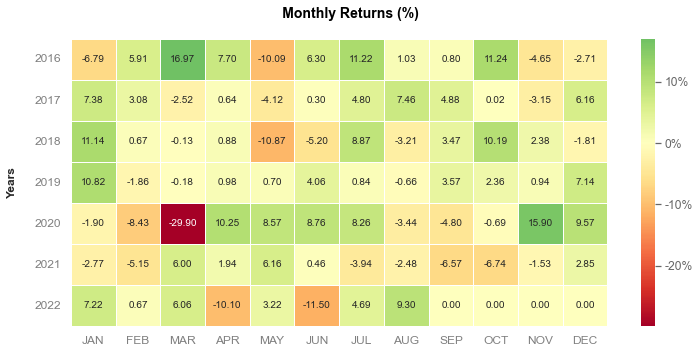

In [18]:
qs.extend_pandas()
retornos_modelo['retorno'].plot_monthly_heatmap() 
retornos_modelo['ibovespa'].plot_monthly_heatmap()

C:\Users\USER\anaconda3\lib\site-packages\quantstats\stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


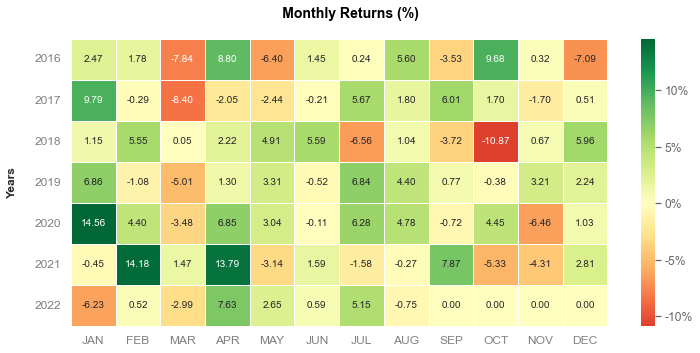

In [19]:
serie_long_short = retornos_modelo['retorno'] - retornos_modelo['ibovespa']
serie_long_short.plot_monthly_heatmap()

In [20]:
# meses batendo o mercado

retornos_modelo_bateu_mercado = retornos_modelo.copy()
retornos_modelo_bateu_mercado['bateu_mercado'] = retornos_modelo['retorno'] > retornos_modelo['ibovespa']
print(retornos_modelo_bateu_mercado)

proporcao_meses_bateu_mercado = sum(retornos_modelo_bateu_mercado['bateu_mercado']/
                                    len(retornos_modelo_bateu_mercado['bateu_mercado']))
print(proporcao_meses_bateu_mercado)

             retorno  ibovespa  bateu_mercado
2016-01-31 -0.043231 -0.067912           True
2016-02-29  0.076903  0.059100           True
2016-03-29  0.091320  0.169673          False
2016-04-30  0.165053  0.077035           True
2016-05-30 -0.164842 -0.100889          False
...              ...       ...            ...
2022-04-30 -0.024692 -0.101026           True
2022-05-30  0.058736  0.032213           True
2022-06-30 -0.109157 -0.115033           True
2022-07-30  0.098388  0.046914           True
2022-08-31  0.085518  0.093045          False

[80 rows x 3 columns]
0.6249999999999998


In [21]:
# retorno anual

retorno_anual = retornos_modelo.copy()
retorno_anual['retorno'] = retorno_anual['retorno'] + 1
retorno_anual['ibovespa'] = retorno_anual['ibovespa'] + 1
retorno_anual['ano'] = retorno_anual.index.year 
retorno_anual['retorno_acumulado_ano'] = retorno_anual.groupby('ano')['retorno'].cumprod() - 1
retorno_anual['retorno_acumulado_ibov'] = retorno_anual.groupby('ano')['ibovespa'].cumprod() - 1
retorno_anual = retorno_anual.reset_index()
retorno_anual = (retorno_anual.groupby(['ano']).tail(1))[['ano', 'retorno_acumulado_ano', 'retorno_acumulado_ibov']]
retorno_anual.style.format({'retorno_acumulado_ano': '{:,.2%}'.format, 'retorno_acumulado_ibov': '{:,.2%}'.format})

,ano,retorno_acumulado_ano,retorno_acumulado_ibov
11,2016,42.23%,38.93%
23,2017,36.72%,26.86%
35,2018,23.49%,15.03%
47,2019,61.55%,31.95%
59,2020,40.88%,2.88%
71,2021,12.34%,-12.14%
79,2022,15.51%,7.58%


In [22]:
acumulative_ret_modelo = (retornos_modelo.retorno + 1).cumprod() - 1
acumulative_ret_ibov = (retornos_modelo.ibovespa + 1).cumprod() - 1
df_acumulado = pd.DataFrame(data = {'retorno_acum_modelo': acumulative_ret_modelo, 
                                    'retorno_acum_ibov': acumulative_ret_ibov},index = acumulative_ret_ibov.index)
df_acumulado = df_acumulado.resample('Y').last()
df_acumulado = df_acumulado[['retorno_acum_modelo', 'retorno_acum_ibov']]
df_acumulado.style.format({'retorno_acum_modelo': '{:,.2%}'.format,'retorno_acum_ibov': '{:,.2%}'.format})

,retorno_acum_modelo,retorno_acum_ibov
2016-12-31 00:00:00,42.23%,38.93%
2017-12-31 00:00:00,94.47%,76.24%
2018-12-31 00:00:00,140.14%,102.74%
2019-12-31 00:00:00,287.95%,167.51%
2020-12-31 00:00:00,446.55%,175.22%
2021-12-31 00:00:00,514.00%,141.80%
2022-12-31 00:00:00,609.26%,160.12%
